https://scikit-learn.org/stable/modules/tree.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

In [2]:
#col_names = ['Play', 'Outlook', 'Temperature', 'Humidity', 'Windy']
#df = pd.read_csv("play_dataset_DT.csv", header=None, names=col_names, delimiter=";")
col_names = ['Play', 'Dados']
df = pd.read_csv("play_dataset_DT.csv", header=None, names=col_names, delimiter=";")
df.head()

,Play,Dados
0,yes,rainy cool normal false
1,no,rainy cool normal true
2,yes,overcast hot high false
3,no,sunny mild high false
4,yes,rainy cool normal false


In [3]:
X = df['Dados']
y = df['Play']

count_vect = CountVectorizer()

count_vect.fit(X)

X_tf = count_vect.transform(X)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tf, y)

In [4]:
count_vect.vocabulary_

{'rainy': 7,
 'cool': 0,
 'normal': 5,
 'false': 1,
 'true': 9,
 'overcast': 6,
 'hot': 3,
 'high': 2,
 'sunny': 8,
 'mild': 4}

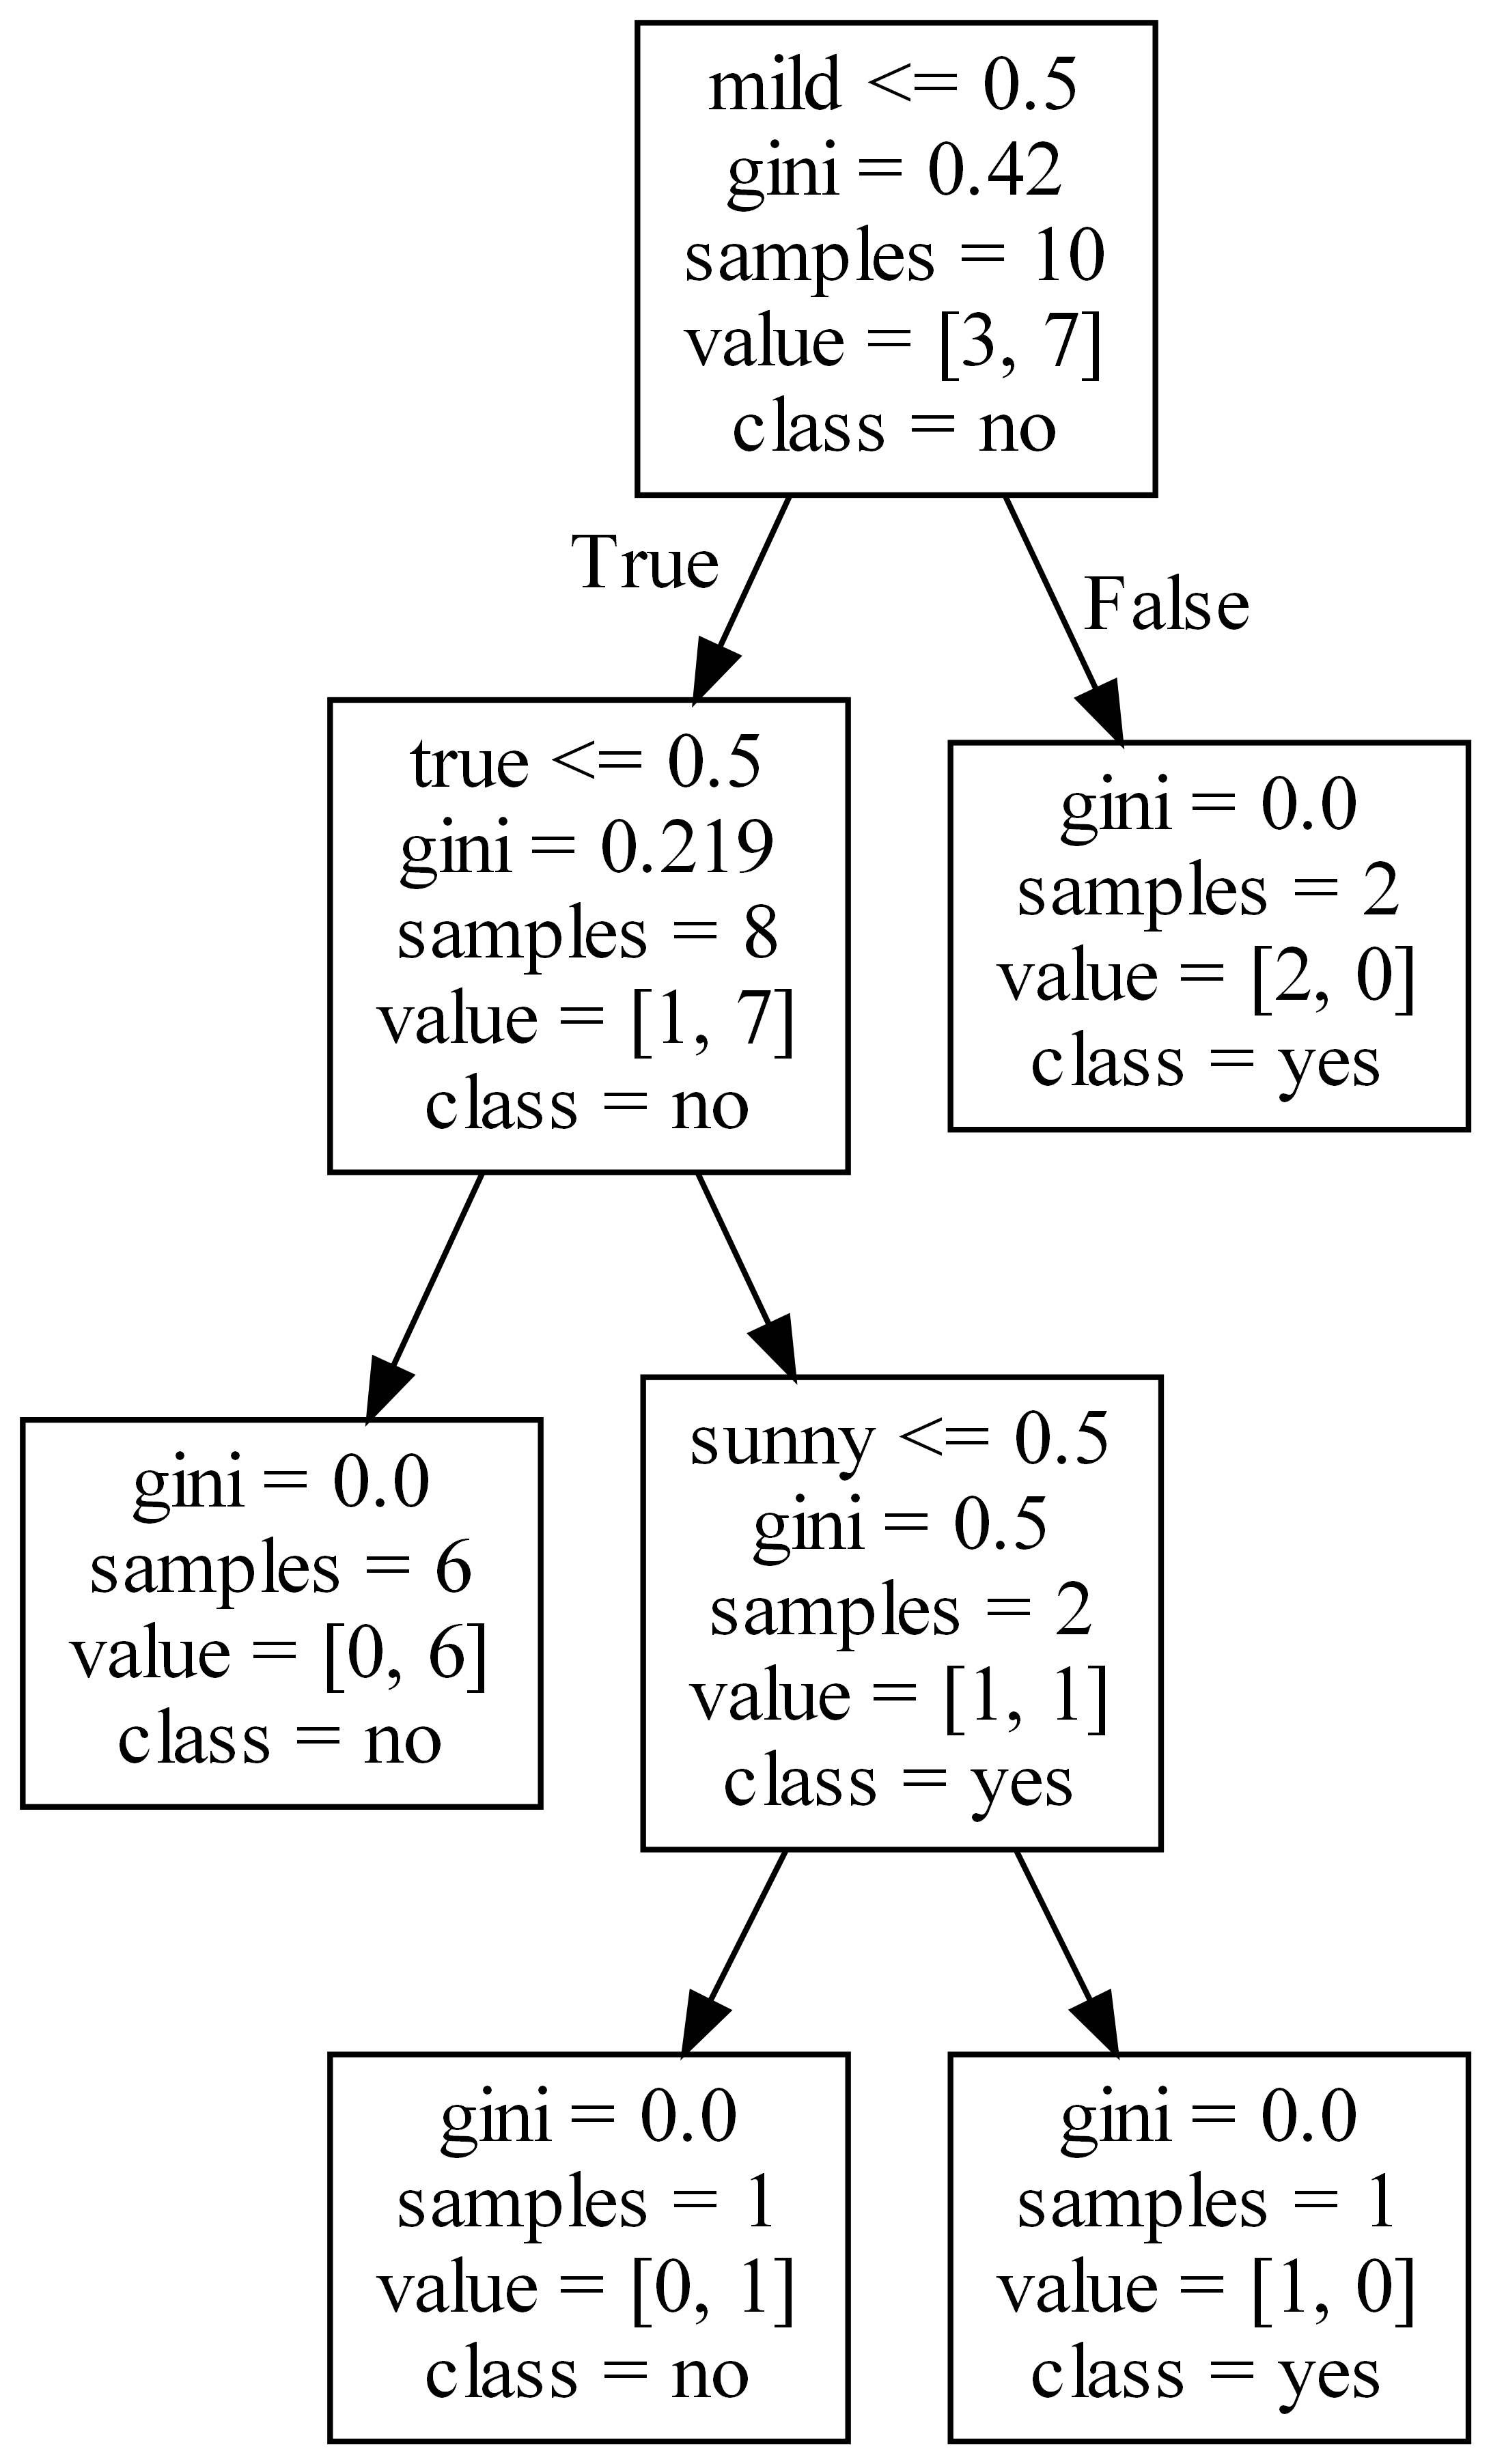

In [5]:
from sklearn.tree import export_graphviz
estimator = clf
export_graphviz(estimator, out_file='dtree.dot', class_names=['yes','no'], feature_names=list(count_vect.vocabulary_))

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'dtree.png')

In [6]:
new_data = count_vect.transform(['sunny cool high false'])
prediction = clf.predict(new_data)
print(prediction)

['yes']


In [8]:
print(new_data)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 8)	1


In [9]:
count_vect.vocabulary_

{'rainy': 7,
 'cool': 0,
 'normal': 5,
 'false': 1,
 'true': 9,
 'overcast': 6,
 'hot': 3,
 'high': 2,
 'sunny': 8,
 'mild': 4}